In [10]:
from numpy.random import RandomState
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.datasets import fetch_olivetti_faces
 
from sklearn import decomposition 
n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

In [11]:
%matplotlib inline

In [3]:
faces = fetch_olivetti_faces(data_home='data\\',shuffle=True, random_state=rng)
faces.data.shape

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to data\


(400, 4096)

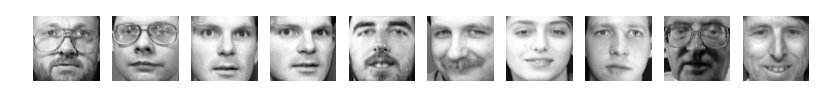

In [12]:
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = plt.subplot2grid((1, 10), (0, i))    
    ax.imshow(faces.data[i * 10].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [13]:
pca = decomposition.PCA()
pca.fit(faces.data)

print(pca.components_.shape)

(400, 4096)


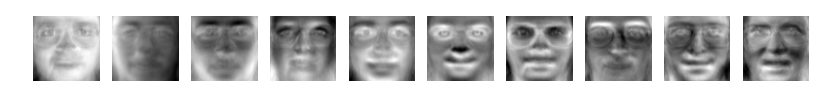

In [14]:
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = plt.subplot2grid((1, 10), (0, i))
    
    ax.imshow(pca.components_[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [19]:
from skimage.io import imsave
face = faces.data[0]  
trans = pca.transform(face.reshape(1, -1))  

In [21]:
trans.shape

(1, 400)

In [22]:
for k in range(400):
    rank_k_approx = trans[:, :k].dot(pca.components_[:k]) + pca.mean_
    if k % 10 == 0:
        imsave('{:>03}'.format(str(k)) + '.jpg', rank_k_approx.reshape(64, 64))

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
